In [1]:
#!pip install pandas

In [2]:
import os
import pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap


plt.style.use("fivethirtyeight")

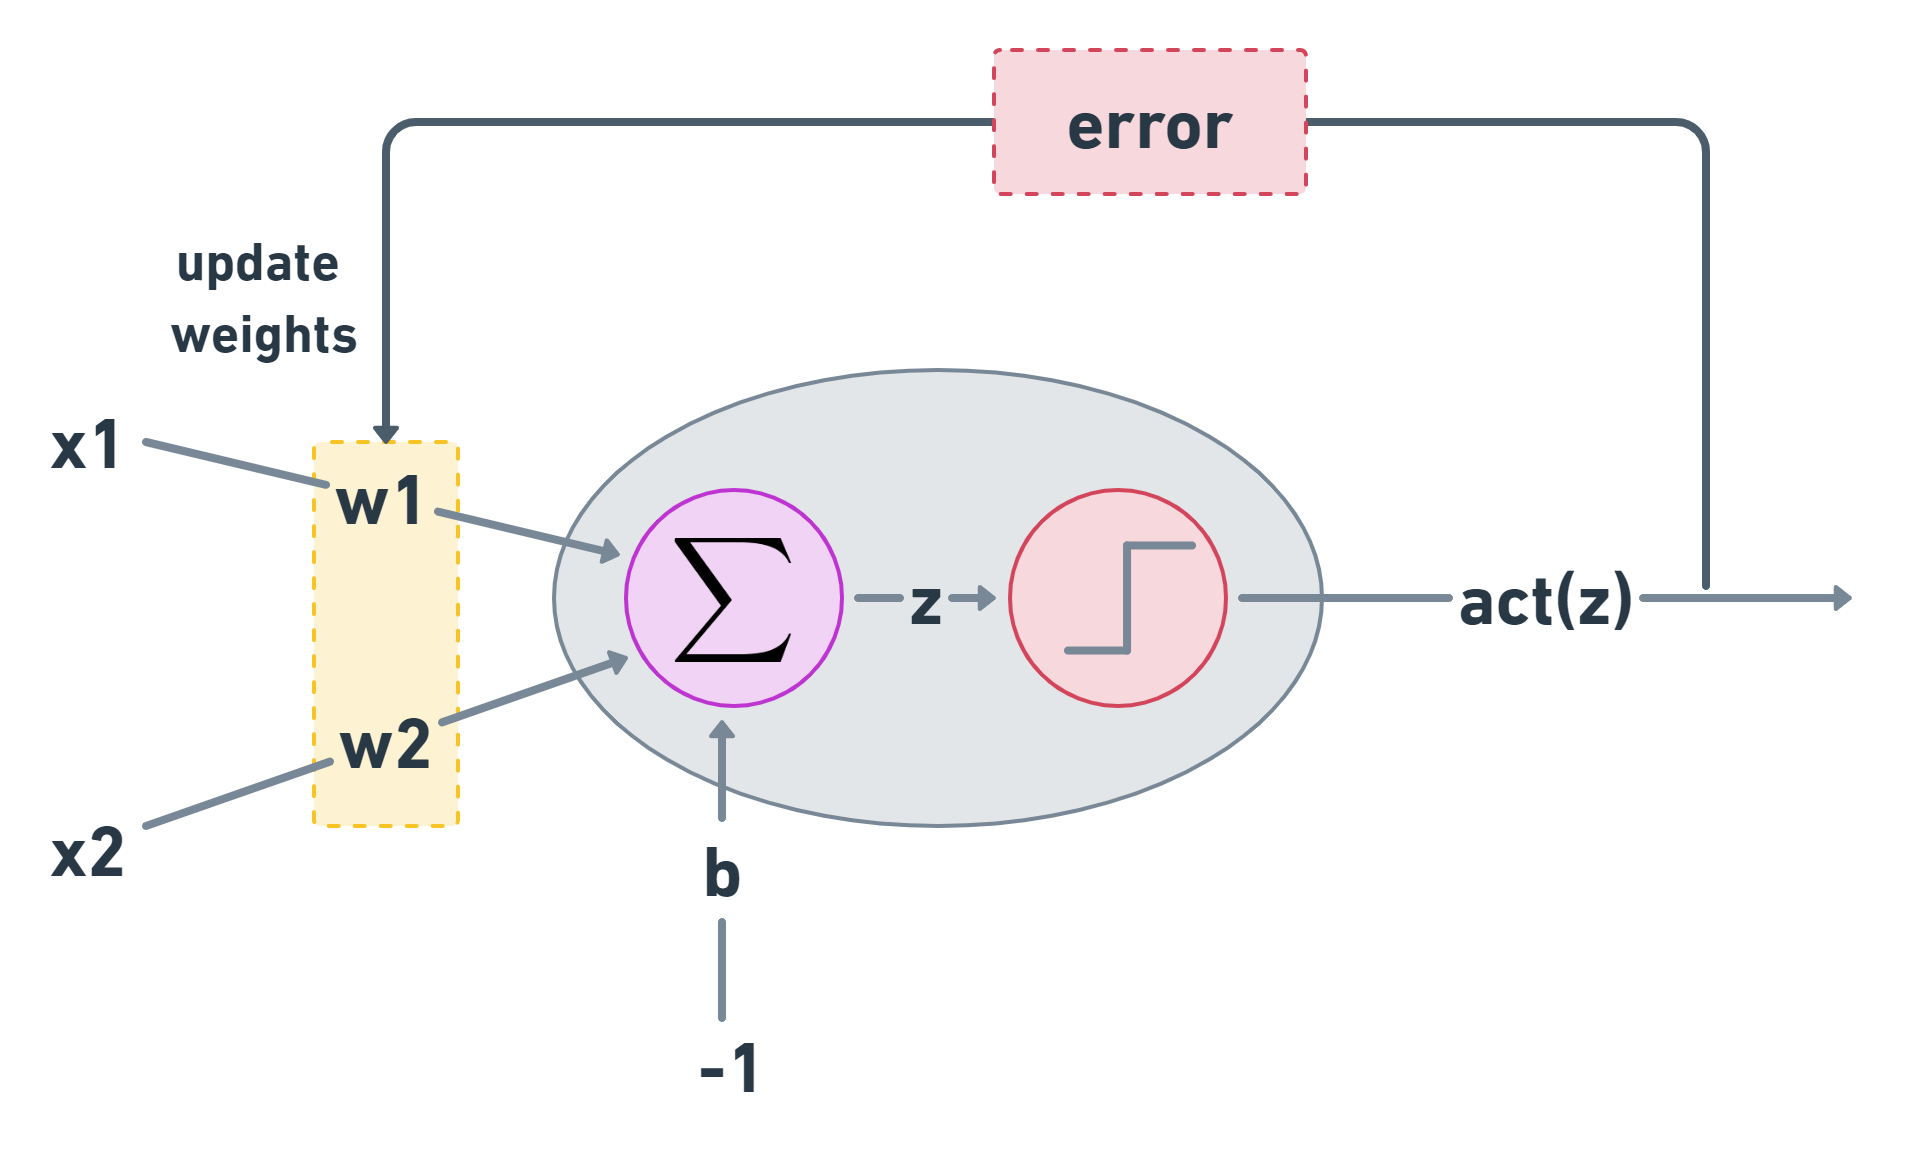

In [3]:
class Perceptron:
    def __init__(self,eta: float=None, epochs: int=None):
        self.weights = np.random.randn(3) * 1e-4 #small random weight s
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before training: \n{self.weights}\n")
        self.eta = eta
        self.epochs = epochs

    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)

    def activation_function(self, z):
        return np.where(z > 0, 1, 0)

    def fit(self, X, y):
        self.X = X
        self.y = y

        X_with_bias = np.c_[self.X, -np.ones((len(self.X),1))]
        print(f"X with bias: \n{X_with_bias}")

        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)

            z = self._z_outcome(X_with_bias,self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n {y_hat}")

            self.error = self.y - y_hat
            print(f"error: \n {self.error}")
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            
            print(f"updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weights}")
            print("##"*10)


    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X),1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)

    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\ntotal loss: {total_loss}\n")
        return total_loss

    def _create_dir_return_path(self,model_dir,filename):
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, filename)


    def save(self,filename,model_dir = None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir,filename)
            joblib.dump(self, model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model",filename)
            joblib.dump(self, model_file_path)

    def load(self,filepath):
        return joblib.load(filepath)
    
    

In [4]:
def prepare_data(df, target_col="y"):
    X = df.drop(target_col, axis=1)

    y = df[target_col]

    return X,y

In [5]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,0,0,1]
}

df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [6]:
X, y = prepare_data(df_AND)

ETA = 0.1 # 0 and 1
EPOCHS = 10


model_and = Perceptron(eta=ETA, epochs=EPOCHS)
model_and.fit(X, y)

_ = model_and.total_loss()

initial weights before training: 
[ 2.48593474e-05  1.02271828e-04 -2.51472958e-05]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
 [1 1 1 1]
error: 
 0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[-0.09997514 -0.09989773  0.29997485]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
 [0 0 0 0]
error: 
 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[2.48593474e-05 1.02271828e-04 1.99974853e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
 [0 0 0 0]
error: 
 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[0.10002486 0.10010227 0.09997485]
####################
--------------------
for epoch >> 3
--------------------


In [7]:
model_and.save(filename="and.model")

In [8]:
reload_model_and = Perceptron().load(filepath = "model/and.model")

In [9]:
reload_model_and.predict(X=[[1,0]])

array([0])

In [10]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,1]
}

df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [11]:
X, y = prepare_data(df_OR)

ETA = 0.1 # 0 and 1
EPOCHS = 10


model_or = Perceptron(eta=ETA, epochs=EPOCHS)
model_or.fit(X, y)

_ = model_or.total_loss()

initial weights before training: 
[-1.43805832e-04  8.44303689e-05 -6.24060663e-05]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
 [1 1 0 1]
error: 
 0   -1
1    0
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 9.98561942e-02  8.44303689e-05 -6.24060663e-05]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
 [1 1 1 1]
error: 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[9.98561942e-02 8.44303689e-05 9.99375939e-02]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
 [0 0 0 1]
error: 
 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 0.19985619  0.10008443 -0.10006241]
####################
--------------------
for epoch >> 3
------

In [12]:
model_or.save(filename="or.model",model_dir="model_or")

In [13]:
reload_model_or = Perceptron().load(filepath = "model/or.model")

In [14]:
reload_model_or.predict(X=[[0,0]])

array([0])

In [15]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [16]:
X, y = prepare_data(df_XOR)

ETA = 0.1 # 0 and 1
EPOCHS = 10


model_or = Perceptron(eta=ETA, epochs=EPOCHS)
model_or.fit(X, y)

_ = model_or.total_loss()

initial weights before training: 
[ 0.00019186 -0.00013756  0.00020075]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
 [0 0 0 0]
error: 
 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 0.10019186  0.09986244 -0.19979925]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
 [1 1 1 1]
error: 
 0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 0.00019186 -0.00013756  0.00020075]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
 [0 0 0 0]
error: 
 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 0.10019186  0.09986244 -0.19979925]
####################
--------------------
for epoch >> 3
--------------------
predicted value af